# Analysis

## Add analysis here

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Check the number of mice.
unique_mice = combined_data["Mouse ID"].unique()
mouse_count = len(unique_mice)
mouse_count

249

In [3]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)
combined_data[duplicates]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Get all the data for the duplicate mouse ID.
g989_df = combined_data[(combined_data["Mouse ID"] == "g989")]
g989_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data = combined_data.drop(combined_data[(combined_data["Mouse ID"] == "g989")].index)
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Check the number of mice in the clean DataFrame.
unique_mice = combined_data["Mouse ID"].unique()
mouse_count = len(unique_mice)
mouse_count

248

# Summary Statistics

In [7]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_by_drug_mean = combined_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_by_drug_median = combined_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_by_drug_var = combined_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_by_drug_std = combined_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_by_drug_sem = combined_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
tumor_by_drug_summary = pd.DataFrame({"Mean Tumor Volume": tumor_by_drug_mean, "Median Tumor Volume": tumor_by_drug_median, 
                                      "Tumor Volume Variance": tumor_by_drug_var, "Tumor Volume Std. Dev.": tumor_by_drug_std, 
                                      "Tumor Volume Std. Err.": tumor_by_drug_sem})

# Display the summary DataFrame
tumor_by_drug_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Using the aggregation method, produce the same summary statistics in a single line.
tumor_by_drug_agg_summary = combined_data.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": 
                                                                         ["mean", "median", "var", "std", "sem"]})
tumor_by_drug_agg_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Group by "Drug Regimen" and count how many times mice have been tested with that drug (in descending order).
mice_tested = combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"].sort_values(ascending=False)

# Create a list of the drug names from above in descending order that will be used for the x-axis in the bar plot.
drugs = mice_tested.index



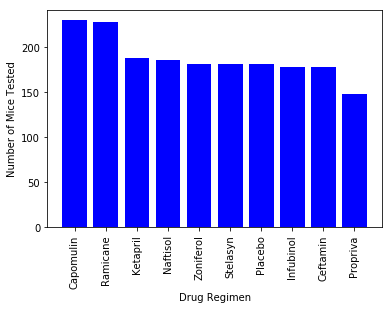

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(drugs, mice_tested, color="b", align="center")
plt.xticks(rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas.

# Create a DataFrame with only the last instance of each unique mouse shown. This removes possible issues with Timepoints when
# trying to figure out the distribution of male versus female mice in the study.
unique_mice_df = combined_data.drop_duplicates(["Mouse ID"], keep="last").reset_index(drop=True)

# Get the total number of male mice in the study.
male_count = unique_mice_df[(unique_mice_df["Sex"] == "Male")].count()["Mouse ID"]

# Get the total number of female mice in the study.
female_count = unique_mice_df[(unique_mice_df["Sex"] == "Female")].count()["Mouse ID"]

# Set the values for the sections of the pie chart.
sizes = [male_count, female_count]

# Label the sections.
labels = ["Male", "Female"]


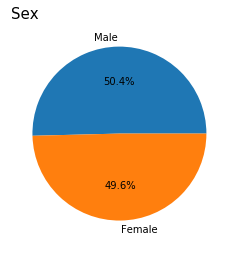

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot.
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Sex", fontsize = 15, loc = "left")
plt.show()